In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/datasets/apple_quality.csv")
data = data.drop(4000)
data.tail(10)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3990,3990.0,-1.396794,-0.599596,-1.931104,1.815668,1.670732,1.614027,-0.987967575,bad
3991,3991.0,-4.007762,2.970164,0.218167,-0.492369,1.656375,-2.133895,-4.431320563,good
3992,3992.0,1.764253,-2.079695,-0.083383,-0.086724,-1.703385,3.840101,-0.338260538,good
3993,3993.0,1.520142,-0.352623,-3.206467,1.341719,0.675568,0.107093,-0.945080106,bad
3994,3994.0,1.482508,-2.581181,-0.306888,1.527877,1.056361,2.560829,-1.229254586,good
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [ ]:
data['Acidity'] = data['Acidity'].astype(float)
data.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity        float64
Quality         object
dtype: object

In [ ]:
# Select relevant columns for clustering
X = data[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']]

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:

# Determine optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    # sum of squared distances of samples to their
    # closest cluster center. It quantifies the compactness of the clusters.

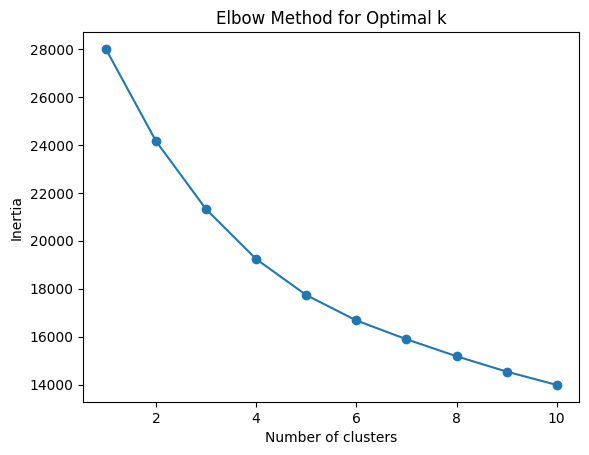

In [ ]:

# Plot the Elbow Method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
# Based on the plot, select an appropriate number of clusters
k = 5

# Perform K-means clustering
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataset
data['Cluster'] = clusters

In [ ]:
# Print cluster centroids
print("Cluster Centroids:")
print(pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns))

# Analyze cluster distribution
print("Cluster Distribution:")
print(data['Cluster'].value_counts())

Cluster Centroids:
       Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness   Acidity
0  0.332066 -0.396089  -0.818692     2.256882  -1.109912 -0.836221  0.264137
1 -2.217581  0.112428   0.465518     0.015474   0.930301  0.287927 -1.665935
2 -0.406402 -1.173041  -2.272323     0.703578  -0.200813  2.364274 -0.989328
3  0.838956 -1.285015  -0.712318     0.183499   2.474591 -0.768052  2.155446
4 -1.325229 -2.175602   1.480330     1.562963   0.895945  1.229464  0.696853
Cluster Distribution:
2    916
0    870
4    758
3    754
1    702
Name: Cluster, dtype: int64


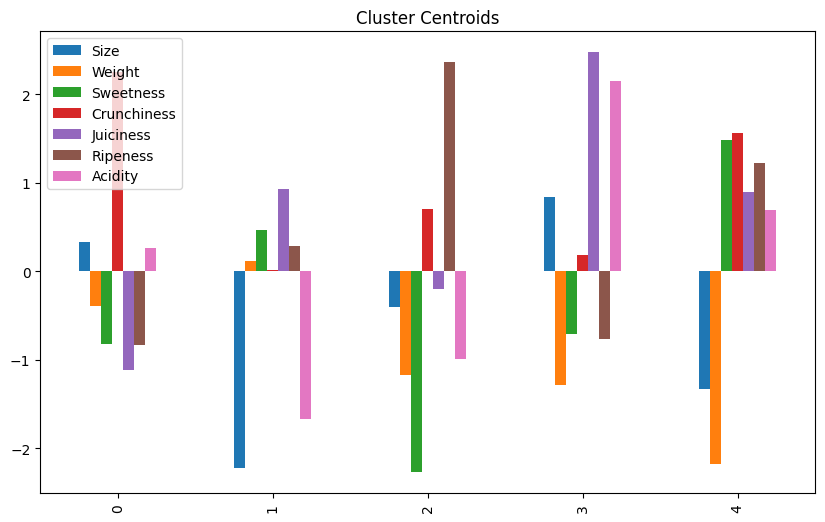

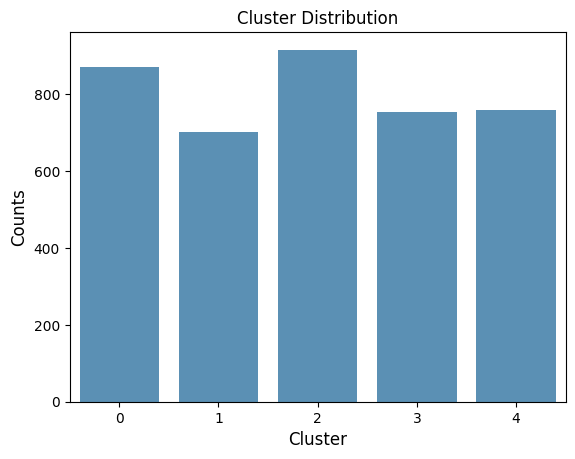

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar os centróides do cluster
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns)
centroids.plot(kind='bar', figsize=(10,6))
plt.title('Cluster Centroids')
plt.show()

# Visualizar a distribuição do cluster
cluster_counts = data['Cluster'].value_counts()
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, alpha=0.8)
plt.title('Cluster Distribution')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.show()


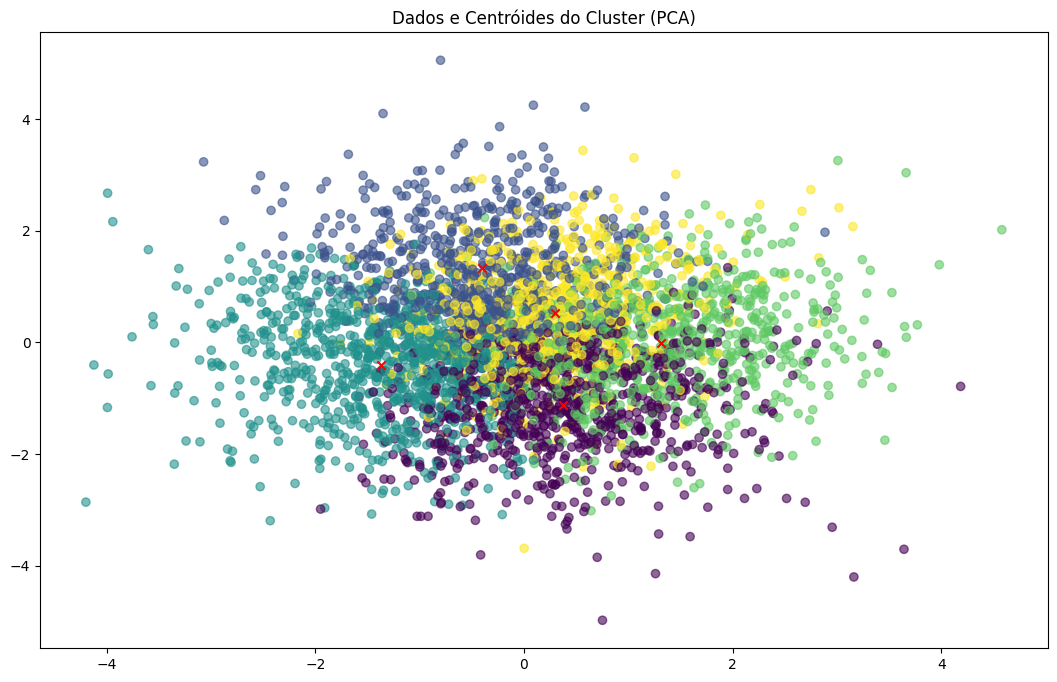

In [ ]:
from sklearn.decomposition import PCA

# Reduzir a dimensionalidade para 2 usando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroids_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(13, 8))
# Plotar os pontos e centróides
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='x')
plt.title('Dados e Centróides do Cluster (PCA)')
plt.show()

